In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is B
 Volume Serial Number is 1E91-9C51

 Directory of C:\Users\91767\Downloads\ASSIGNMENTS\RANDOM FOREST

24-03-2023  11:17    <DIR>          .
11-03-2023  13:47    <DIR>          ..
22-03-2023  21:08    <DIR>          .ipynb_checkpoints
23-02-2023  12:23            17,023 Company_Data.csv
23-02-2023  12:23            21,837 Fraud_check.csv
22-03-2023  21:06         1,262,488 Random forest(company data).ipynb
24-03-2023  11:17           348,939 Random forest(fraud check).ipynb
               4 File(s)      1,650,287 bytes
               3 Dir(s)  167,786,446,848 bytes free


In [3]:
rf1=pd.read_csv("Fraud_check.csv")
rf1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


# EDA

In [4]:
rf1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
rf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
rf1.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
127,NO,Single,75501,93035,28,YES
25,NO,Divorced,31417,124606,27,YES
203,YES,Divorced,56536,117260,4,NO
360,YES,Single,65203,107937,5,YES
257,YES,Married,54747,31611,17,YES


In [7]:
rf1.shape

(600, 6)

In [8]:
rf1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# checking taxable.income < 30000

In [9]:
rf1[rf1['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES



# Pair Plot

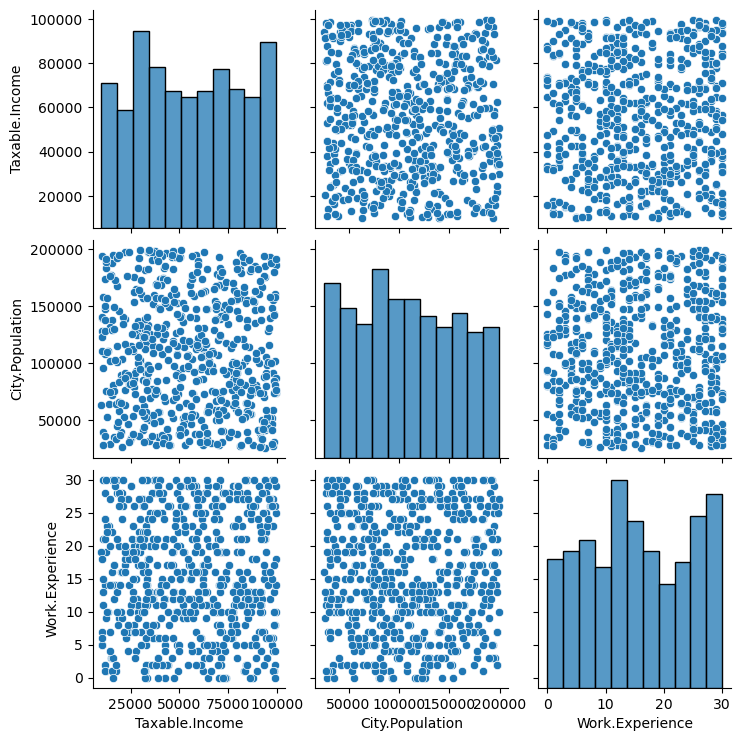

In [10]:
sns.pairplot(rf1)

# Data preprocessing

# Converting Taxable.Income variables into categorical as good and risky

In [11]:
jm=['risky','good']
rf1['TIV']=pd.cut(rf1['Taxable.Income'],bins=[0,30000,1000000],labels=jm)

In [12]:
for i in range(0,len(rf1['Taxable.Income'])):
    if rf1['Taxable.Income'][i]<=30000:
        rf1['TIV'][i]='risky'
    else:
                rf1['TIV'][i]='good'

In [13]:
rf1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TIV
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [14]:
rf1["TIV"].value_counts()

good     476
risky    124
Name: TIV, dtype: int64

In [15]:
sns.countplot(rf1['TIV'])

<AxesSubplot:xlabel='TIV', ylabel='count'>

# Coverting other attributes to numerical

In [16]:
rf1["TIV"]=rf1["TIV"].replace(['risky','good'],[0,1])
rf1["Marital.Status"]=rf1["Marital.Status"].replace(['Single','Divorced','Married'],[0,1,2])
rf1["Urban"]=rf1["Urban"].replace(['YES','NO'],[1,0])
rf1["Undergrad"]=rf1["Undergrad"].replace(['YES','NO'],[1,0])


In [17]:
rf1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TIV
0,0,0,68833,50047,10,1,1
1,1,1,33700,134075,18,1,1
2,0,2,36925,160205,30,1,1
3,1,0,50190,193264,15,1,1
4,0,2,81002,27533,28,0,1


In [18]:
rf1["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [19]:
rf1["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

# creating new dataframe to split into x and y values

In [20]:
rf2=rf1[['Undergrad','Marital.Status','City.Population',
       'Work.Experience','Urban','TIV']]

In [21]:
rf2

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TIV
0,0,0,50047,10,1,1
1,1,1,134075,18,1,1
2,0,2,160205,30,1,1
3,1,0,193264,15,1,1
4,0,2,27533,28,0,1
...,...,...,...,...,...,...
595,1,1,39492,7,1,1
596,1,1,55369,2,1,1
597,0,1,154058,0,1,1
598,1,2,180083,17,0,1


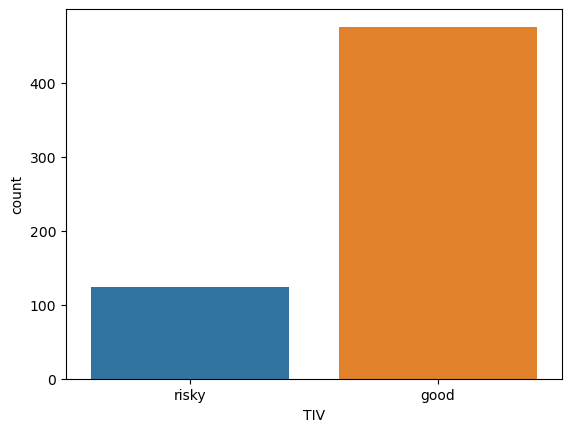

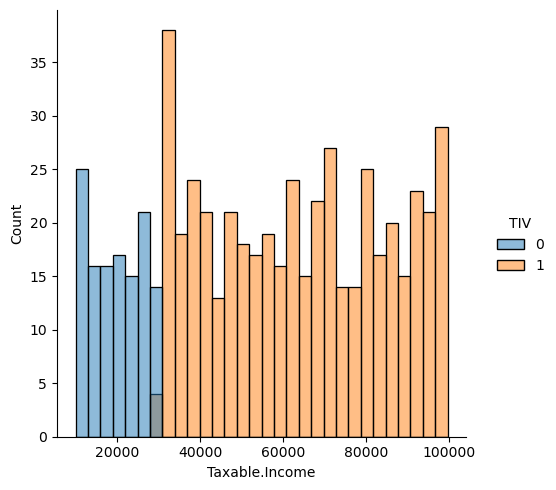

In [22]:
sns.displot(x="Taxable.Income",data=rf1,hue="TIV",bins=30)
plt.show()

# MODEL BUILDING

In [23]:
x=rf2.iloc[:,:-1]
y=rf2.iloc[:,-1]

In [24]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,1,134075,18,1
2,0,2,160205,30,1
3,1,0,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,1,39492,7,1
596,1,1,55369,2,1
597,0,1,154058,0,1
598,1,2,180083,17,0


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TIV, Length: 600, dtype: category
Categories (2, int64): [0 < 1]

# SPLITTING DATA INTO TRAINING AND TESTING DATA

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=20)

In [27]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
256,1,2,168568,14,0
98,1,2,77053,18,1
345,1,1,118798,6,0
594,0,2,97526,9,1
383,1,2,148246,5,1
...,...,...,...,...,...
218,0,2,38091,19,0
223,1,2,192297,17,1
271,0,0,183682,20,0
474,1,1,80729,0,0


In [28]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
493,0,2,103226,29,0
172,0,2,52819,23,1
352,0,1,72115,16,1
506,0,0,111105,8,1
595,1,1,39492,7,1
...,...,...,...,...,...
25,0,1,124606,27,1
389,1,0,183187,5,1
28,1,0,128766,5,1
228,0,2,100696,9,1


In [29]:
y_test


493    0
172    0
352    0
506    0
595    1
      ..
25     1
389    1
28     0
228    0
296    1
Name: TIV, Length: 300, dtype: category
Categories (2, int64): [0 < 1]

In [30]:
y_train

256    1
98     0
345    1
594    1
383    1
      ..
218    1
223    1
271    1
474    1
355    1
Name: TIV, Length: 300, dtype: category
Categories (2, int64): [0 < 1]

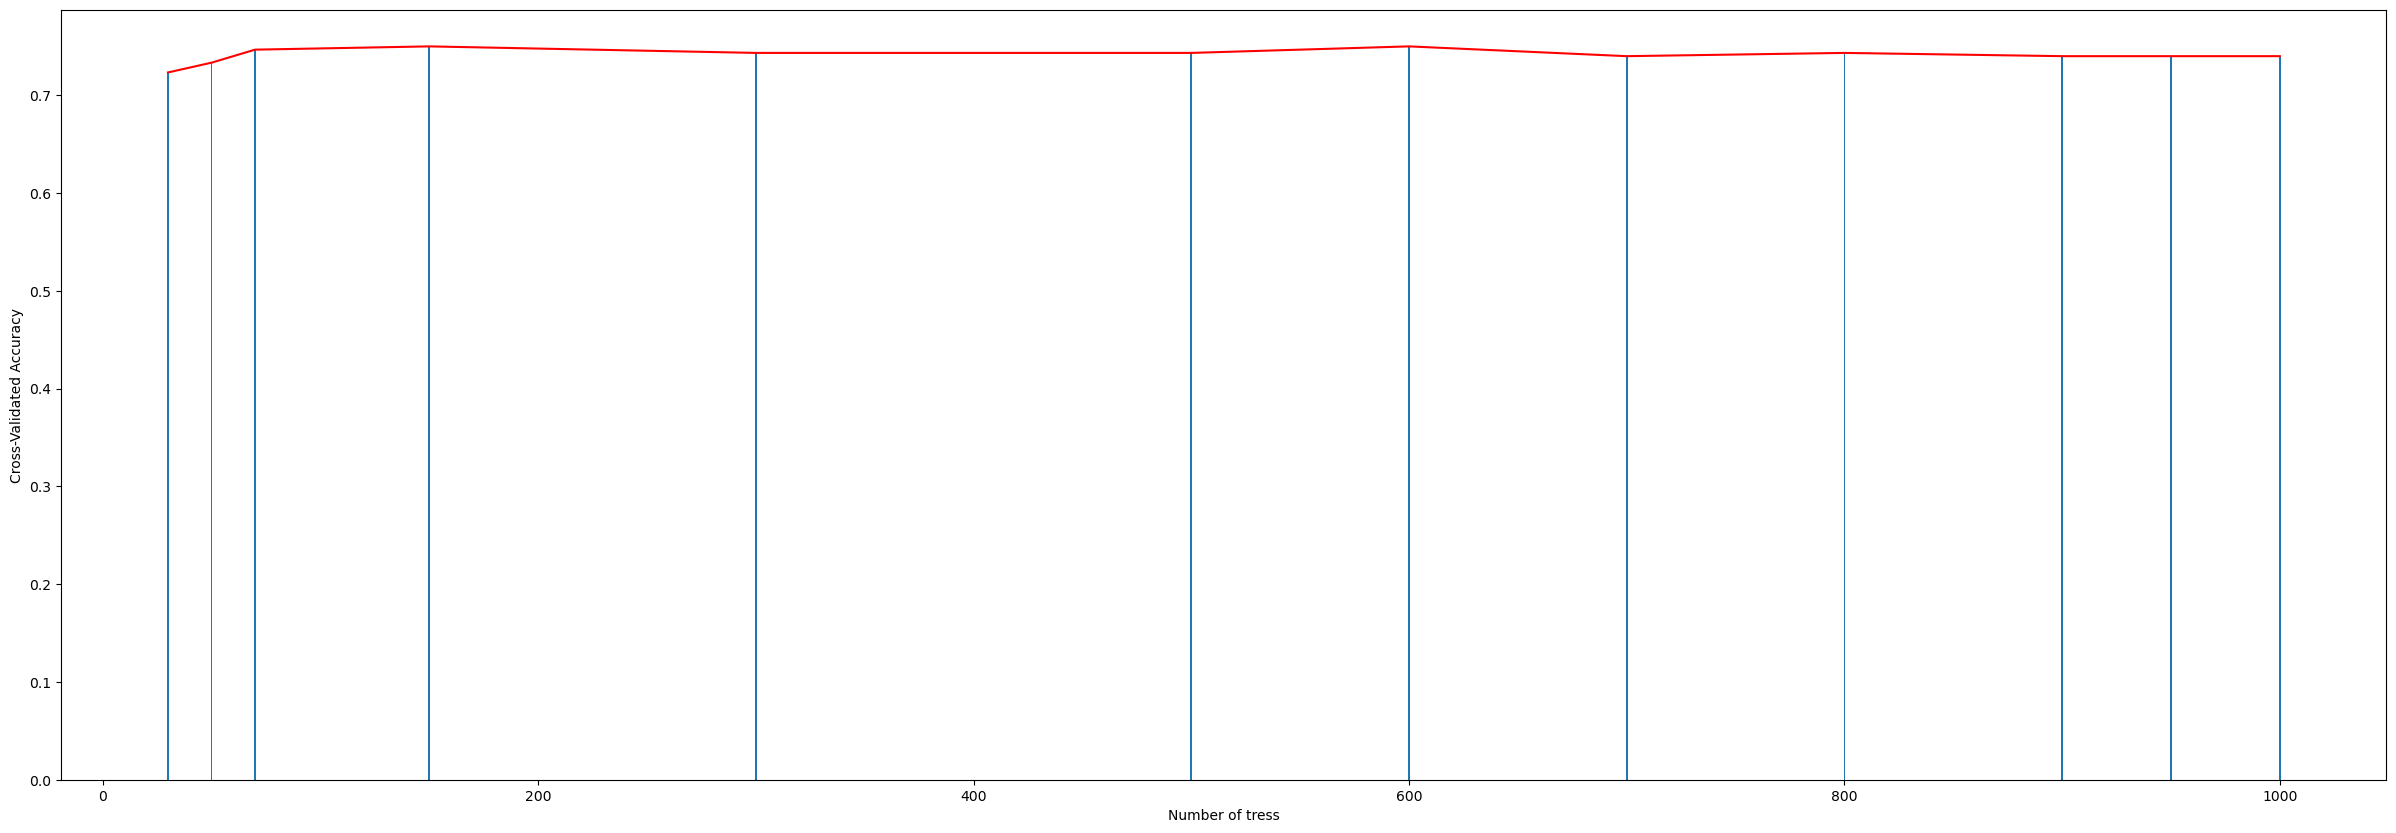

In [43]:
%matplotlib inline
num_trees = [30,50,70,150,300,500,600,700,800,900,950,1000]
nf=[2,4,6,8,9]6
k_scores = []




for k in num_trees:

    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, x_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores)
plt.plot(num_trees, k_scores,color="red")

plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


# Grid search CV to find best Hyperparameter

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
mj=RandomForestClassifier()
parameters={
    "n_estimators":[110,130,150,170],
    "max_features":[4,6,8,10]
}

In [46]:
grid1=GridSearchCV(mj,parameters,cv=20)

In [47]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 6, 8, 10],
                         'n_estimators': [110, 130, 150, 170]})

In [48]:
grid1.best_score_

0.7433333333333333

In [49]:
grid1.best_params_

{'max_features': 4, 'n_estimators': 110}

In [50]:
model1=RandomForestClassifier(max_features=4,n_estimators=130)

In [51]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=130)

In [52]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.12      0.05      0.07        59
           1       0.80      0.90      0.85       241

    accuracy                           0.74       300
   macro avg       0.46      0.48      0.46       300
weighted avg       0.66      0.74      0.69       300



# TREE ESTIMATORS WITH GINI INDEX

In [56]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=6)

In [58]:
preds=grid1.predict(x_test)
pd.Series(preds).value_counts()

1    277
0     23
dtype: int64

In [59]:
metrics.accuracy_score(preds,y_test)

0.7466666666666667

In [61]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.13      0.05      0.07        59
           1       0.80      0.92      0.85       241

    accuracy                           0.75       300
   macro avg       0.46      0.48      0.46       300
weighted avg       0.67      0.75      0.70       300



In [63]:
print(confusion_matrix(y_test,preds))

[[  3  56]
 [ 20 221]]


In [65]:
from sklearn import tree

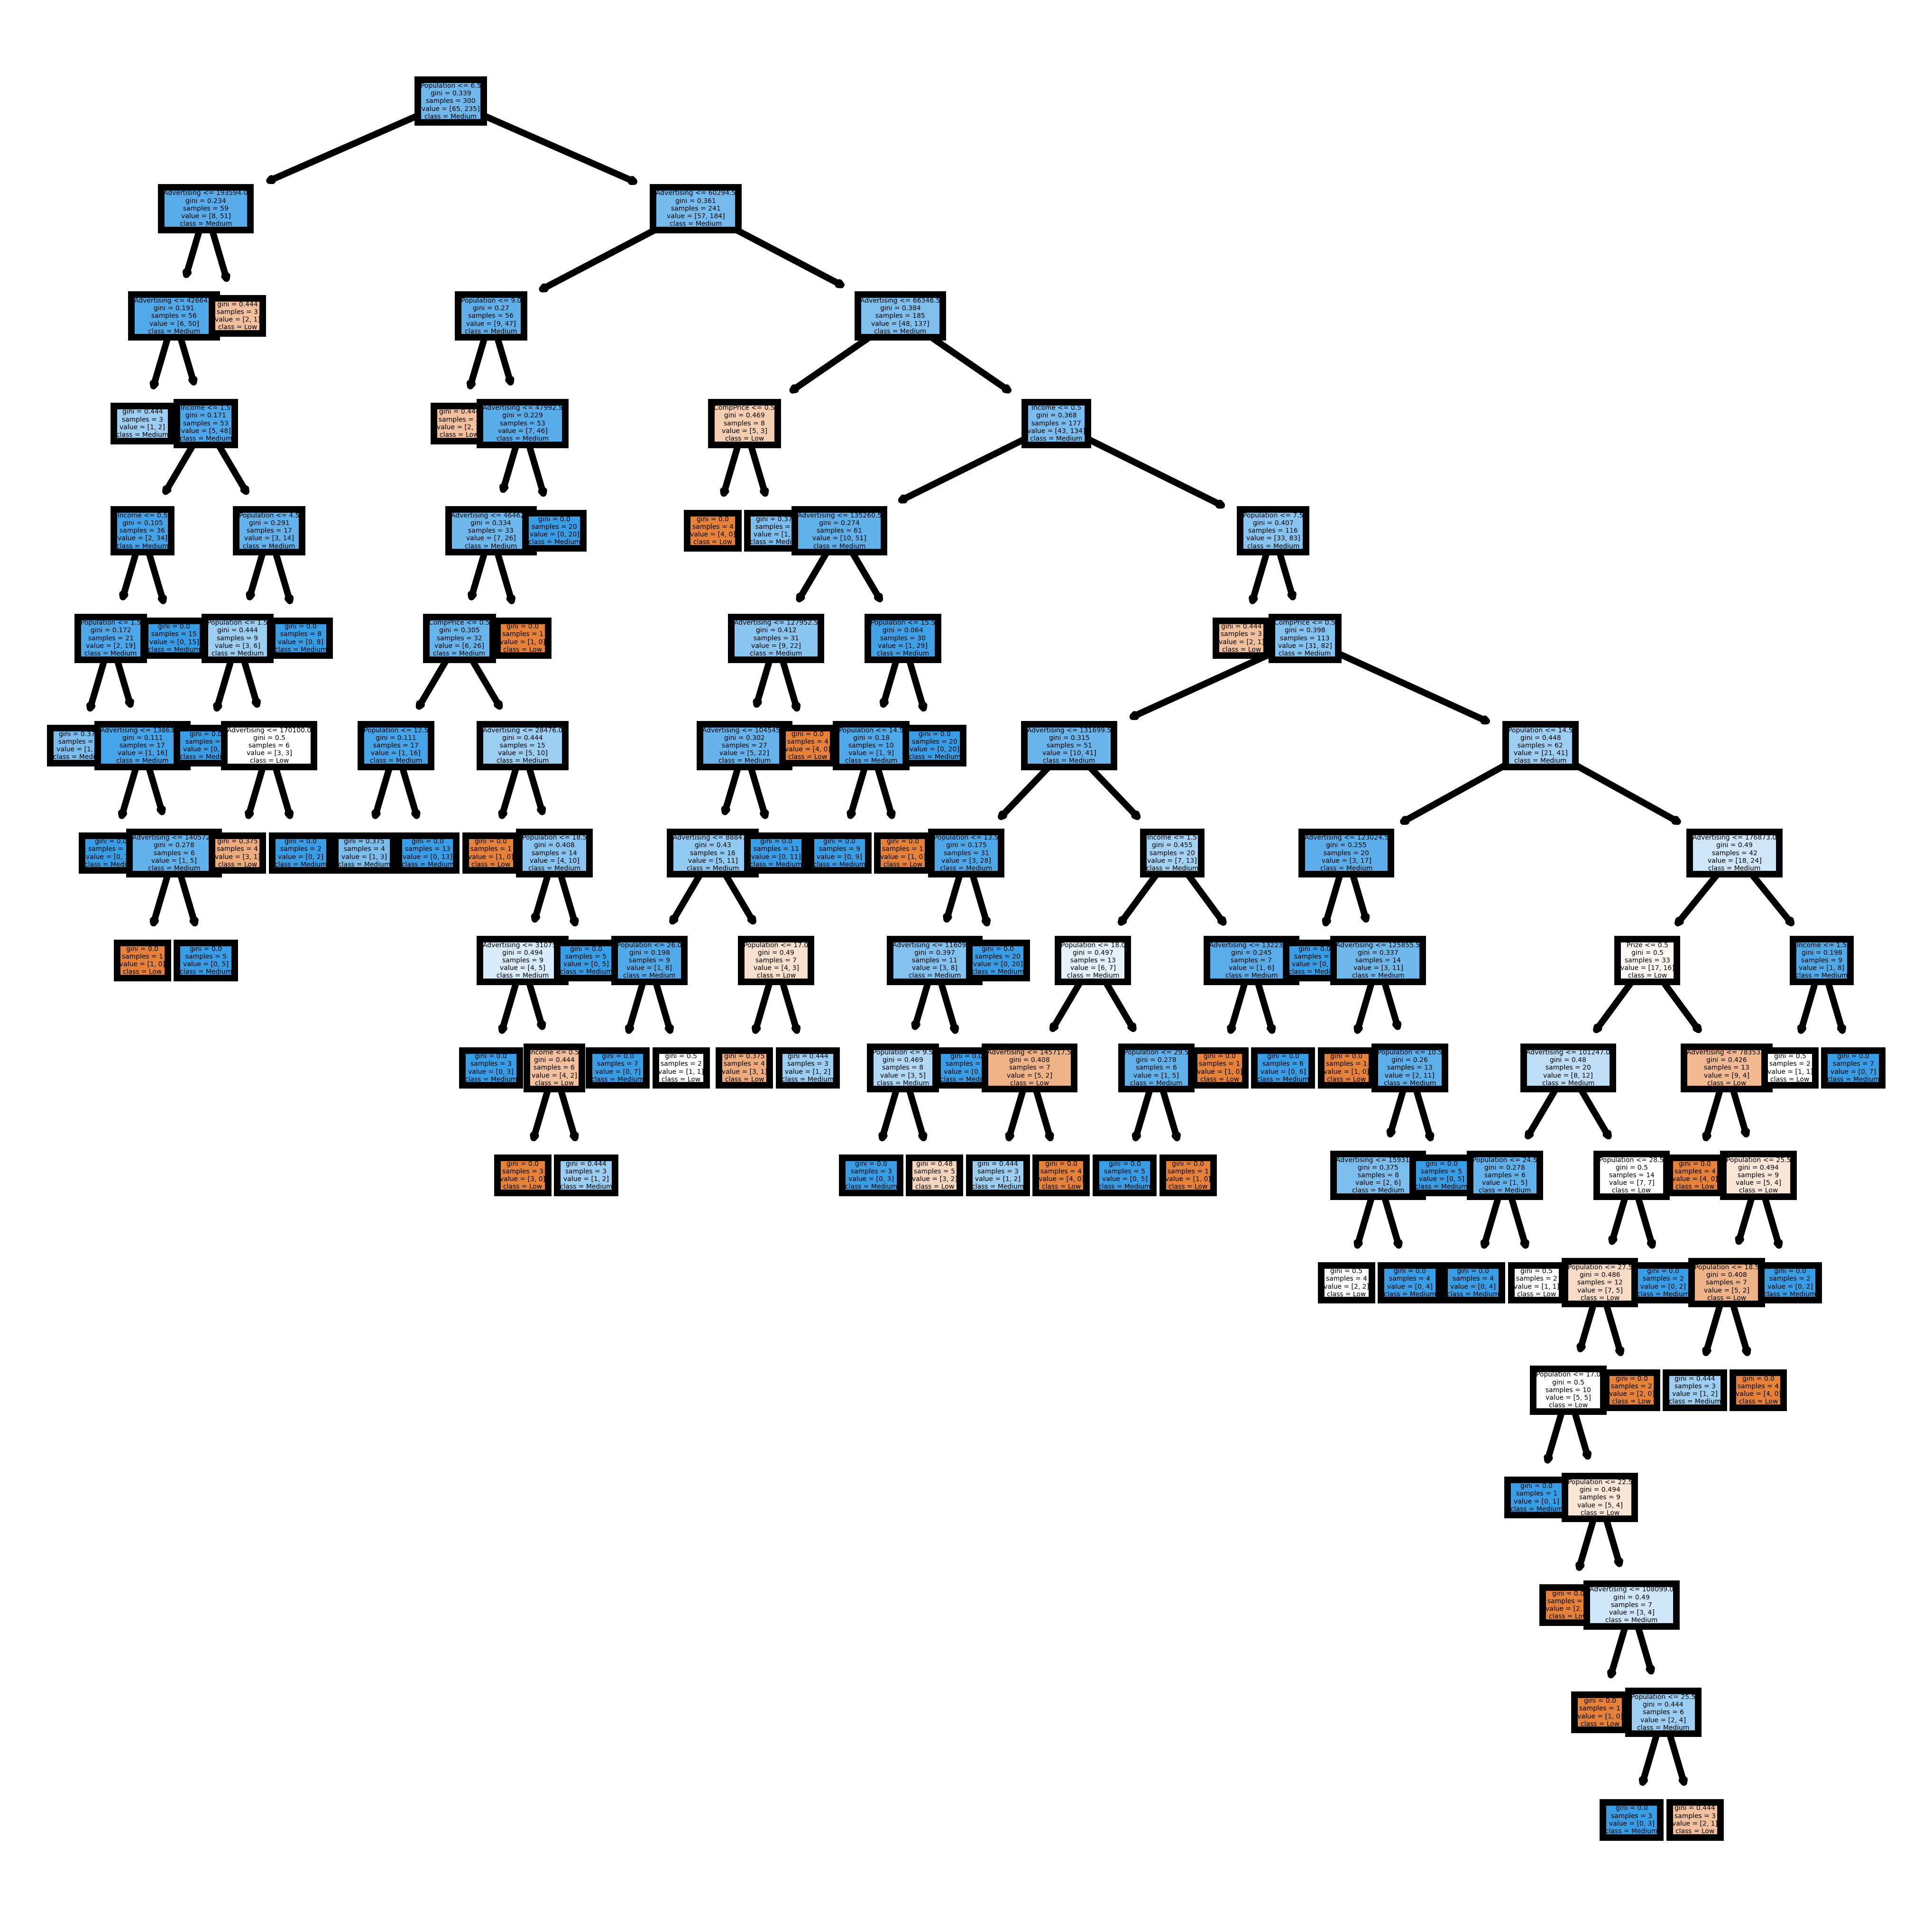

In [68]:
fe=['CompPrice','Income','Advertising','Population','Prize','ShelveLoc',
    'Age','Education','Urban','US']
ta=['Low','Medium','High']
fig,axes=plt.subplots(figsize=(5,5),dpi=1000)
tree.plot_tree(model,feature_names=fe,class_names=ta,filled= True);
plt.show()